# ゴミ分別（バックエンド）

## データの読み込み
data→浅尾さんが作ってくれたデータです。
dataに画像データの名前があって、画像データそのものは別のファイル(dataset_team4/img_team4/batch_1とか)に入ってます。
ここでは、dataにある画像データの名前から画像データそのものを取ってきて、dataframe型にしたのち、元のdataの横に結合することで一つのdataframeを作りました。

### 必要なやつのimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import glob
import cv2

### データの読み込み（画像データそのものは別ファイルに保存、その名前がimg_fileの列にあります）

In [2]:
data = pd.read_csv("dataset_team4/df_1_final.csv")

In [3]:
data

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0000,1225.0000,153.0,198.0,14765.5
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0000,55.0000,93.0,88.0,4273.0
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0000,557.0000,89.0,236.0,17734.0
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0000,127.0000,447.0,1322.0,403954.0
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0000,1168.0000,240.0,122.0,23393.0
...,...,...,...,...,...,...,...,...,...,...,...
209,209,3024,4032,batch_14/000086.jpg,Plastic film,Plastic bag & wrapper,1152.1428,1268.2856,376.0,477.0,123008.0
210,210,3024,4032,batch_14/000096.jpg,Glass bottle,Bottle,934.0000,3067.0000,906.0,587.0,196153.5
211,211,3024,4032,batch_15/000040.jpg,Disposable plastic cup,Cup,1231.0000,2246.0000,356.0,360.0,78185.5
212,212,3024,4032,batch_15/000042.jpg,Disposable plastic cup,Cup,1533.0000,2213.0000,312.0,333.0,67954.5


### 使う画像データの名前をまとめる。
globってやつで条件に合うものを取り出すことができる。
ここではbatch_1、batch_2、batch_3、、、、、って15個あるフォルダから画像データの名前を取り出してまとめて一つにした。

In [4]:
files_1 = sorted(glob.glob("dataset_team4/img_team4/batch_1/*"))
files_2 = sorted(glob.glob("dataset_team4/img_team4/batch_2/*"))
files_3 = sorted(glob.glob("dataset_team4/img_team4/batch_3/*"))
files_4 = sorted(glob.glob("dataset_team4/img_team4/batch_4/*"))
files_5 = sorted(glob.glob("dataset_team4/img_team4/batch_5/*"))
files_6 = sorted(glob.glob("dataset_team4/img_team4/batch_6/*"))
files_7 = sorted(glob.glob("dataset_team4/img_team4/batch_7/*"))
files_8 = sorted(glob.glob("dataset_team4/img_team4/batch_8/*"))
files_9 = sorted(glob.glob("dataset_team4/img_team4/batch_9/*"))
files_10 = sorted(glob.glob("dataset_team4/img_team4/batch_10/*"))
files_11 = sorted(glob.glob("dataset_team4/img_team4/batch_11/*"))
files_12 = sorted(glob.glob("dataset_team4/img_team4/batch_12/*"))
files_13 = sorted(glob.glob("dataset_team4/img_team4/batch_13/*"))
files_14 = sorted(glob.glob("dataset_team4/img_team4/batch_14/*"))
files_15 = sorted(glob.glob("dataset_team4/img_team4/batch_15/*"))

In [5]:
files = files_1 + files_2 + files_3 + files_4 + files_5 + files_6 + files_7 + files_8 + files_9 + files_10 + files_11 + files_12 + files_13 + files_14 + files_15

In [6]:
files[:5]
#filesってリストの中には使うデータの名前がずらっと並んでる

['dataset_team4/img_team4/batch_1/000000.jpg',
 'dataset_team4/img_team4/batch_1/000004.jpg',
 'dataset_team4/img_team4/batch_1/000005.jpg',
 'dataset_team4/img_team4/batch_1/000006.jpg',
 'dataset_team4/img_team4/batch_1/000011.jpg']

### 画像データそのものを読み込んでいく
一つ上でまとめた画像データの名前をもとに、読み込んでいく。
imagesの中には画像データそのものが入っていく。

In [7]:
images = []

for i in files:
    #image_size = 60
    image = Image.open(i)
    image = image.convert("RGB")
    #image = image.resize((image_size, image_size))
    image_diverse = np.asarray(image)
    images.append(image_diverse)

In [8]:
#images[0]　重いのでコメントアウト
#試しに初めのデータをみてみる。numpy型になっている。

In [48]:
images[0].shape

(2049, 1537, 3)

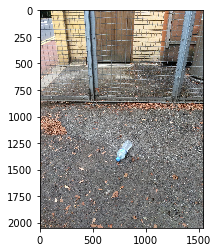

In [9]:
plt.imshow(images[0])
#確かに一番初めの画像が読み込まれている。

### ゴミがある部分だけの切り出し。
背景があると邪魔だから、ゴミがある部分だけを切り出してtrm_imagesってリストに格納。
使う情報はdataの中にあるx,y(ゴミがある座標)とwidth,height(ゴミがある範囲)

In [10]:
x = data['x']
y = data['y']
width = data['width']
height = data['height']
    
trm_images = []
index = 0
while (214 > index):
    triming = images[index][int(y[index]):int((y[index]+height[index])),int(x[index]):int((x[index]+width[index]))]#スライスで切り出し。スライスに小数は使えないから、intで丸めた。

    index += 1

    trm_images.append(triming)
    

In [11]:
#trm_images[0]　重いのでコメントアウト

In [12]:
trm_images[0].shape

(198, 153, 3)

In [13]:
type(trm_images[0].shape)

tuple

### 切り出した時、画像の範囲を超えているものがあったので、それを手動で切り出し。
画像全体の範囲よりもゴミのある位置が外側に指定されているデータがあった。(147番目と210番目)

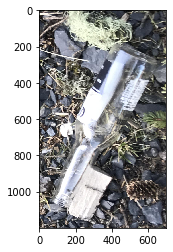

In [14]:
#210 147
x = 2300,
y=500
height=1000
width = 500
trm_image_147 = images[147][500:500+1000,2300:2300+500] 
trm_image_210 = images[210][1000:2200,3000:3700]
plt.imshow(trm_image_210)

In [15]:
#リストに代入
trm_images[147] = trm_image_147
trm_images[210] = trm_image_210
trm_images[210].shape

(1200, 700, 3)

In [16]:
#サイズ合わせ
trm_images_resize=[]
for trm_image in trm_images:
    resize = cv2.resize(trm_image,(120,120))
    trm_images_resize.append(resize)

In [17]:
#確認
index=0
while index<5:
    print(trm_images_resize[index].shape,index)
    index+=1


(120, 120, 3) 0
(120, 120, 3) 1
(120, 120, 3) 2
(120, 120, 3) 3
(120, 120, 3) 4


In [64]:
type(trm_images_resize[0])

numpy.ndarray

In [66]:
type(trm_images_resize)

list

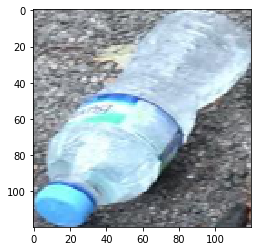

In [18]:
plt.imshow(trm_images_resize[0])

### trm_imaesはリストだから、dataframeにしてdataと結合する。
→ここいらなかった

In [19]:
image_df = pd.Series(trm_images_resize)

In [20]:
image_df = pd.DataFrame(image_df)

In [21]:
image_df.head()

,0
0,"[[[136, 137, 141], [125, 126, 130], [143, 144,..."
1,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6..."
2,"[[[140, 135, 126], [129, 123, 114], [116, 110,..."
3,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5..."
4,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],..."


In [73]:
image_df.loc[1].values.shape

(1,)

In [22]:
image_df.columns = ['img']
##これはカラム名をimgにして分かりやすくしている。

In [23]:
image_df.at[0, 'img'].shape

(120, 120, 3)

In [24]:
type(image_df)

pandas.core.frame.DataFrame

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
df = pd.concat([data, image_df], axis=1)
df.head()

##横に結合したものが得られた。

,img_id,img_width,img_height,img_file,cat_name,supercategory,x,y,width,height,area,img
0,0,1537,2049,batch_1/000000.jpg,Clear plastic bottle,Bottle,710.0,1225.0,153.0,198.0,14765.5,"[[[136, 137, 141], [125, 126, 130], [143, 144,..."
1,1,1241,751,batch_1/000004.jpg,Drink can,Can,649.0,55.0,93.0,88.0,4273.0,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6..."
2,2,1537,2049,batch_1/000005.jpg,Clear plastic bottle,Bottle,824.0,557.0,89.0,236.0,17734.0,"[[[140, 135, 126], [129, 123, 114], [116, 110,..."
3,3,1537,2049,batch_1/000006.jpg,Glass bottle,Bottle,517.0,127.0,447.0,1322.0,403954.0,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5..."
4,4,1537,2049,batch_1/000011.jpg,Drink can,Can,522.0,1168.0,240.0,122.0,23393.0,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],..."


# Labelとの結合

In [27]:
label = pd.read_csv("dataset_team4/Label.csv")

In [28]:
df_label = pd.concat([df, label['Label']], axis=1)

In [29]:
df_trash = df_label.loc[:, ['img', 'Label','cat_name']]
df_trash.head()

,img,Label,cat_name
0,"[[[136, 137, 141], [125, 126, 130], [143, 144,...",bottle or petbottle,Clear plastic bottle
1,"[[[146, 134, 76], [144, 130, 72], [140, 125, 6...",nonflammable,Drink can
2,"[[[140, 135, 126], [129, 123, 114], [116, 110,...",bottle or petbottle,Clear plastic bottle
3,"[[[56, 37, 31], [56, 37, 31], [60, 41, 35], [5...",bottle or petbottle,Glass bottle
4,"[[[201, 189, 185], [97, 86, 83], [81, 67, 66],...",nonflammable,Drink can


In [30]:
#df_trash.to_csv('df_trash.csv')

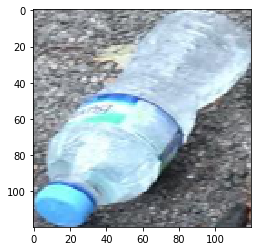

In [31]:
plt.imshow(df_trash.at[0,'img'])

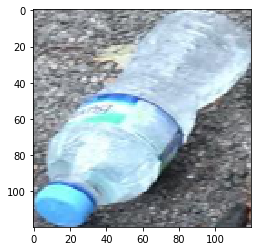

In [32]:
data = df_trash.loc[:,['img']]
#data=df_trash.loc[:,'img']
#data=df_trash.at[:,'img']
cat_name = df_trash.loc[:,['cat_name']]
plt.imshow(data.at[0,'img'])

### モデルの作成

In [112]:
x = trm_images_resize
y = df['cat_name'].values

In [113]:
type(x)

list

In [114]:
type(y)

numpy.ndarray

In [115]:
X = np.array(x)

In [116]:
type(X)

numpy.ndarray

In [117]:
X.shape

(214, 120, 120, 3)

In [118]:
y.shape

(214,)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [120]:
X_train

array([[[[ 44,  39,  27],
         [212, 197, 172],
         [137, 116,  90],
         ...,
         [246, 229, 201],
         [175, 153, 128],
         [ 59,  34,  18]],

        [[ 46,  40,  24],
         [157, 140, 112],
         [255, 243, 217],
         ...,
         [223, 207, 183],
         [107,  86,  66],
         [105,  78,  66]],

        [[ 56,  49,  30],
         [ 83,  67,  37],
         [190, 176, 158],
         ...,
         [109,  91,  73],
         [124, 104,  89],
         [156, 135, 126]],

        ...,

        [[113,  94,  87],
         [ 99,  81,  71],
         [ 68,  46,  38],
         ...,
         [ 32,  27,  23],
         [ 23,  19,  16],
         [ 22,  22,  21]],

        [[ 99,  80,  73],
         [100,  82,  72],
         [ 71,  51,  42],
         ...,
         [ 29,  24,  20],
         [ 22,  18,  15],
         [ 25,  24,  22]],

        [[120, 101,  94],
         [123, 105,  95],
         [ 92,  74,  64],
         ...,
         [ 22,  18,  15],
        

In [121]:
X_train = X_train.transpose([0,2,3,1])
X_test = X_test.transpose([0,2,3,1])

In [122]:
Y_train = np.identity(5)[y_train].astype('i')
Y_test = np.identity(5)[y_test].astype('i')

IndexError: arrays used as indices must be of integer (or boolean) type

In [103]:
import keras
# 層構造のモデルを定義するためのメソッド
from keras.models import Sequential
# Denseは層の生成メソッド、Activationは活性化関数を定義するためのメソッド
from keras.layers import Dense, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

In [104]:
# モデルの定義

#-----------
# CNNモデル
#-----------

model = Sequential()

model.add(Conv2D(filters=64, input_shape=(120, 120, 3), kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(4, 4), strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

In [105]:
# 同様に学習前にコンパイルします。
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01), # 学習率を0.01に指定
              metrics=['accuracy'])

# ミニバッチに含まれるサンプル数を指定
batch_size = 500

# epoch数を指定
n_epoch = 30

In [106]:
hist = model.fit(X_train,
                 y_train,
                 epochs=n_epoch,
                 validation_data=(X_test, y_test),
                 verbose=1,
                 batch_size=batch_size)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
from sklearn import metrics
print('accuracy: %.3f' % metrics.accuracy_score(y_test, model.predict(X_test).argmax(axis=1)))
print('recall: %.3f' % metrics.recall_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('precision: %.3f' % metrics.precision_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))
print('f1_score: %.3f' % metrics.f1_score(y_test, model.predict(X_test).argmax(axis=1), average='macro'))

In [ ]:
def plot_history_loss(hist):
    # 損失値(Loss)の遷移のプロット
    plt.plot(hist.history['loss'],label="loss for training")
    plt.plot(hist.history['val_loss'],label="loss for validation")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()

def plot_history_acc(hist):
    # 精度(Accuracy)の遷移のプロット
    plt.plot(hist.history['acc'],label="accuracy for training")
    plt.plot(hist.history['val_acc'],label="accuracy for validation")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0, 1])
    plt.show()

plot_history_loss(hist)
plot_history_acc(hist)

In [ ]:
# testデータのサンプルについて情報を確認する関数
# (testデータのindex)
def show_test_sample_info(index):
    img = X_test[index]
    
    # 画像を出力
    plt.imshow(img)
    plt.show()
    
    # 正解ラベルを出力
    print('class: ' + label[y_test[index]])
    print('label: ' + str(y_test[index]))

In [ ]:
# indexを指定
index = 0

# 画像を出力
show_test_sample_info(index)

# 指定のindexが与えられたtestデータについて確認
pred = model.predict(X_test[index].reshape(1, 32, 32, 3)).argmax()
print('predict: {}'.format(pred))

# 正解か不正解かを出力
if pred == y_test[index]:
    print('正解です｡')
else:
    print('間違いです｡')